### CSE-221710310060-SAHITHI.P

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.Perform all the necessary data preprocessing steps required

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
# No null values
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:

data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### 2.Visualize the relationship between the features and the response using scatterplots

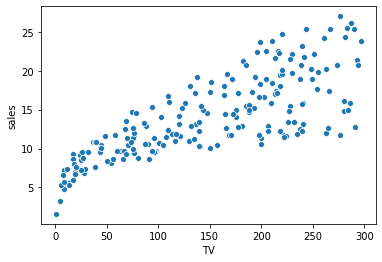

In [6]:
sns.scatterplot("TV","sales",data=data)

The Sales increase when Tv advertisements increase

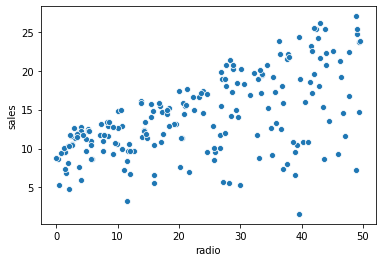

In [8]:
sns.scatterplot("radio","sales",data=data)

Sales increases with the increase of the radio advertisements but sometimes drop with increasing in radio advertisements.

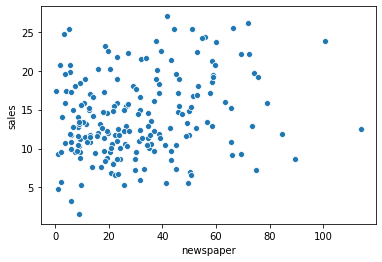

In [9]:
sns.scatterplot("newspaper","sales",data=data)

The impact on sales with increase in newspaper advertisements is not clear 

#### 3.Check for correlation and observe if there is any multicollinearity.

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


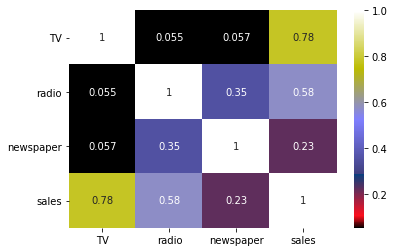

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='gist_stern')

In [13]:
correlation=data.corr()
cor=correlation[correlation>0.5]
cor

,TV,radio,newspaper,sales
TV,1.000000,NaN,NaN,0.782224
radio,NaN,1.000000,NaN,0.576223
newspaper,NaN,NaN,1.0,NaN
sales,0.782224,0.576223,NaN,1.000000


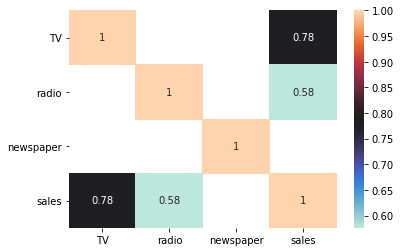

In [15]:
sns.heatmap(cor,annot=True,cmap='icefire')

In [17]:
x=data.drop(columns=['sales'])
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y=data[['sales']]
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [22]:
#Intercept and the coefficient values
print(lm.intercept_)
lm.coef_

[2.89257005]


array([[0.04416235, 0.19900368, 0.00116268]])

In [23]:

y_train_pred=lm.predict(X_train)
y_train_pred

array([[10.62420524],
       [19.5419182 ],
       [18.37463236],
       [15.26284415],
       [10.02487307],
       [ 8.17260763],
       [21.50975323],
       [14.14823568],
       [16.30996795],
       [ 8.85509348],
       [15.23153021],
       [12.32242242],
       [13.64852005],
       [14.17607882],
       [18.40185911],
       [19.24193422],
       [20.24381109],
       [17.44505298],
       [ 9.24109062],
       [11.75336116],
       [19.79642606],
       [ 9.80950414],
       [20.80042258],
       [23.32343742],
       [10.13147045],
       [17.3137333 ],
       [19.53122711],
       [18.50680928],
       [16.84593627],
       [18.57944535],
       [17.06456086],
       [ 8.86557659],
       [ 9.96958118],
       [ 5.33193027],
       [ 3.58046283],
       [16.57691776],
       [12.86700495],
       [18.07899796],
       [11.79508257],
       [12.56748077],
       [13.73208519],
       [ 6.99405932],
       [16.59518043],
       [ 9.77789051],
       [ 8.03719883],
       [15

In [24]:
y_train_pred == y_train

,sales
71,False
124,False
184,False
97,False
149,False
...,...
67,False
192,False
117,False
47,False


In [25]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([[10.0494569 ],
       [ 7.43052335],
       [ 6.97152143],
       [24.16378667],
       [12.00215643],
       [ 6.54334645],
       [13.09526331],
       [14.95879164],
       [11.00528358],
       [16.27234553],
       [22.99324688],
       [ 9.12188347],
       [10.33545333],
       [15.39628185],
       [11.60589932],
       [12.11484332],
       [18.60251172],
       [10.81414474],
       [16.07541355],
       [17.22753644],
       [24.2342995 ],
       [ 9.47711838],
       [15.13960412],
       [12.41064749],
       [ 5.67814427],
       [15.22889947],
       [12.21635459],
       [20.94370559],
       [13.28068231],
       [ 9.16578351],
       [13.30285718],
       [21.5770033 ],
       [18.098111  ],
       [21.15572322],
       [ 6.69734039],
       [ 6.15355714],
       [ 7.96280151],
       [13.09426248],
       [14.81032968],
       [ 6.22020075],
       [12.2799744 ],
       [ 9.1817324 ],
       [15.04882696],
       [16.26091437],
       [17.16859664],
       [13

In [26]:
y_test_pred == y_test

,sales
18,False
170,False
107,False
98,False
177,False
182,False
5,False
146,False
12,False
152,False


In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

#### For Training Data


In [28]:
# For Training Data
print('R^2: ',r2_score(y_train,y_train_pred))
print("Adjusted R^2 value:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train,y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('RMSE',np.sqrt(mean_squared_error(y_train,y_train_pred)))

R^2:  0.9072183330817297
Adjusted R^2 value: 0.9053118604738201
MAE: 1.2248611099616429
MSE: 2.438917493390848
RMSE 1.5617033948195311


#### For Test Data

In [29]:
# For Test Data
print('R^2: ',r2_score(y_test,y_test_pred))
print("Adjusted R^2 value:",1-(1-r2_score(y_test,y_test_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2:  0.8576396745320892
Adjusted R^2 value: 0.8483553054798342
MAE: 1.3000320919235455
MSE: 4.012497522917101
RMSE 2.0031219440955415
